# ------- Cleaning The Data--------

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
test = pd.read_csv('Rossmann_test.csv')
train=pd.read_csv('Rossmann_train.csv')
store=pd.read_csv('Rossmann_store.csv')

C:\Users\jhkan\AppData\Local\Temp\ipykernel_9500\4148583819.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('Rossmann_train.csv')


In [65]:
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [66]:
train["StateHoliday"].replace("0",0,inplace=True)

In [67]:
train['SchoolHoliday'].unique()

array([1, 0])

In [68]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [69]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [2]:
closed = train[train['Open'] == 0]['DayOfWeek']
closed=pd.DataFrame(closed, columns=['DayOfWeek'])

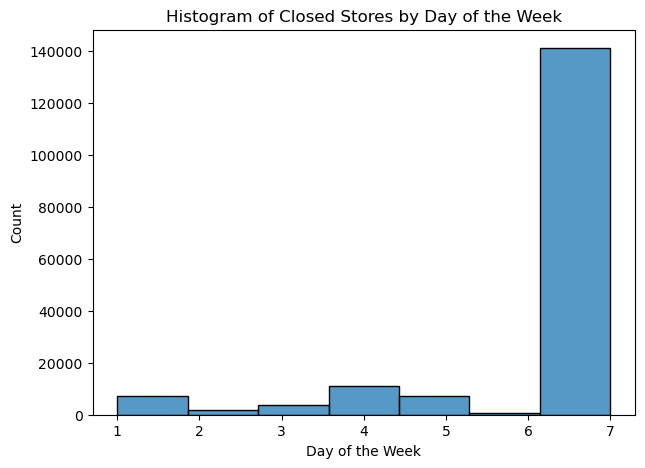

In [71]:
plt.figure(figsize=(7,5))
sns.histplot(data=closed, x='DayOfWeek', bins=7)  # Adjust the number of bins as needed
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Histogram of Closed Stores by Day of the Week')
plt.show()

Majority of store closures occur on Sundays

In [3]:
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

In [4]:
train['AvgPurchase'] = train.Sales / train.Customers
train.AvgPurchase.fillna(0, inplace=True)

In [5]:
train["Date"] = pd.to_datetime(train["Date"])
train.set_index("Date", inplace=True)
train["Year"] = train.index.year.astype('int64') 
train["Month"] = train.index.month.astype('int64')

In [6]:
train = train.sort_index()
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,AvgPurchase,Year,Month
Date,,,,,,,,,,,
2013-01-01,1097,2,5961,1405,1,0,a,1,4.242705,2013,1
2013-01-01,85,2,4220,619,1,0,a,1,6.817447,2013,1
2013-01-01,259,2,6851,1444,1,0,a,1,4.744460,2013,1
2013-01-01,262,2,17267,2875,1,0,a,1,6.005913,2013,1
2013-01-01,274,2,3102,729,1,0,a,1,4.255144,2013,1


In [7]:
train.index.max()

Timestamp('2015-07-31 00:00:00')

In [77]:
train.index.min()

Timestamp('2013-01-01 00:00:00')

In [78]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
def season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    elif month in [12, 1, 2]:
        return "Winter"

train["Season"] = train["Month"].apply(season)

In [80]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [9]:
store_sales = train.groupby('Store')['Sales'].sum().reset_index()
sales_threshold = store_sales['Sales'].quantile(0.8)

store_sales20 = store_sales[store_sales['Sales'] >= sales_threshold]

# Filters the train dataframe based on the top 20% stores
final_train = train[train['Store'].isin(store_sales20['Store'])]

In [82]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [83]:
store[store['Promo2']==0][['Promo2SinceWeek','Promo2SinceYear','PromoInterval']].isnull().sum()

Promo2SinceWeek    544
Promo2SinceYear    544
PromoInterval      544
dtype: int64

In [84]:
store.Promo2SinceWeek.fillna(0, inplace=True)
store.Promo2SinceYear.fillna(0, inplace=True)
store.PromoInterval.fillna(0, inplace=True)

In [85]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [10]:
from sklearn.impute import KNNImputer

# Create a DataFrame with the columns that need imputation
columns_to_impute = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance']
col = store[columns_to_impute].copy() 

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Perform imputation
imputed_data = imputer.fit_transform(col)

# Create a DataFrame with the imputed data
imputed_df = pd.DataFrame(imputed_data, columns=columns_to_impute)

# Replace the missing values in the original DataFrame with the imputed values
store[columns_to_impute] = imputed_df


In [87]:
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

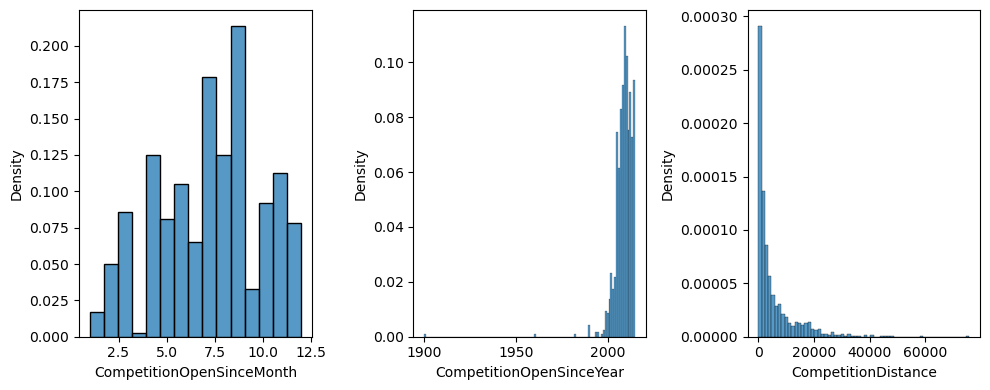

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))

sns.histplot(store, x='CompetitionOpenSinceMonth', stat="density", ax = axes[0])
sns.histplot(store, x='CompetitionOpenSinceYear', stat="density", ax = axes[1])
sns.histplot(store, x='CompetitionDistance', stat="density", ax = axes[2])
plt.tight_layout()

In [11]:
x = final_train.reset_index()

merged_sales = x.merge(store, how='left', on='Store')

merged_sales.set_index('Date', inplace=True)

merged_sales.isna().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
AvgPurchase                       0
Year                              0
Month                             0
Season                            0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek              116353
Promo2SinceYear              116353
PromoInterval                116353
dtype: int64

In [12]:
merged_sales.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,AvgPurchase,Year,...,Season,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1097,2,5961,1405,1,0,a,1,4.242705,2013,...,Winter,b,b,720.0,3.0,2002.0,0,NaN,NaN,NaN
2013-01-01,85,2,4220,619,1,0,a,1,6.817447,2013,...,Winter,b,a,1870.0,10.0,2011.0,0,NaN,NaN,NaN
2013-01-01,259,2,6851,1444,1,0,a,1,4.744460,2013,...,Winter,b,b,210.0,6.6,2005.0,0,NaN,NaN,NaN
2013-01-01,262,2,17267,2875,1,0,a,1,6.005913,2013,...,Winter,b,a,1180.0,5.0,2013.0,0,NaN,NaN,NaN
2013-01-01,335,2,2401,482,1,0,a,1,4.981328,2013,...,Winter,b,a,90.0,8.0,2012.6,1,31.0,2013.0,"Jan,Apr,Jul,Oct"


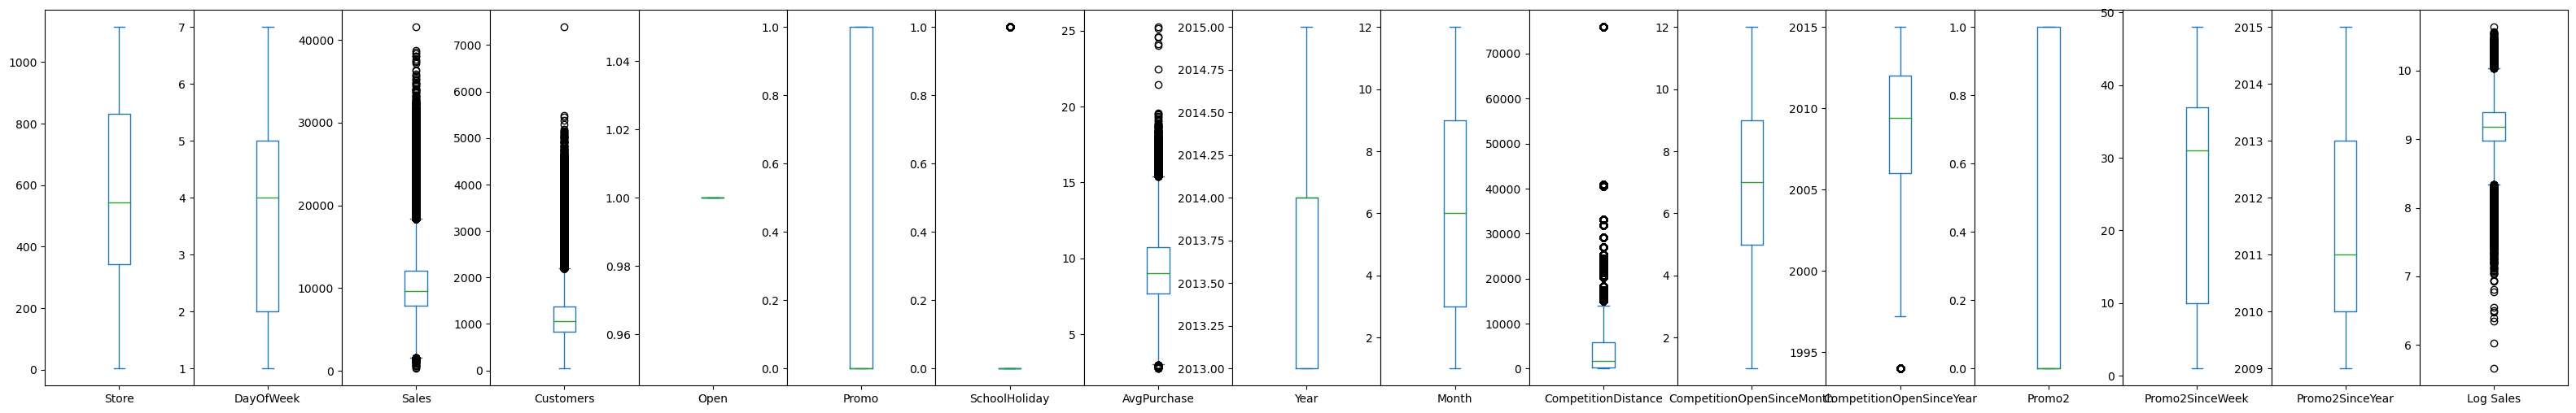

In [27]:

merged_sales.plot(
    kind='box', 
    sharey=False, 
    subplots = True,
    figsize=(40, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.0000005) 
plt.show()

In [91]:
merged_sales.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
AvgPurchase                  float64
Year                           int64
Month                          int64
Season                        object
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

# ------------Exploratory Analysis---------

**Seasonal sale patterns, trends, cycles**

In [92]:
Season_year = final_train.groupby(['Year', 'Season'])[['Sales']].agg(Sales=('Sales', 'mean')).reset_index()

In [93]:
Season_year

,Year,Season,Sales
0,2013,Autumn,9934.264834
1,2013,Spring,10558.522268
2,2013,Summer,10103.482018
3,2013,Winter,10717.089098
4,2014,Autumn,10256.926114
5,2014,Spring,10379.759767
6,2014,Summer,10260.111992
7,2014,Winter,10758.462535
8,2015,Spring,10775.634897
9,2015,Summer,10685.656467


<Axes: xlabel='Season', ylabel='Sales'>

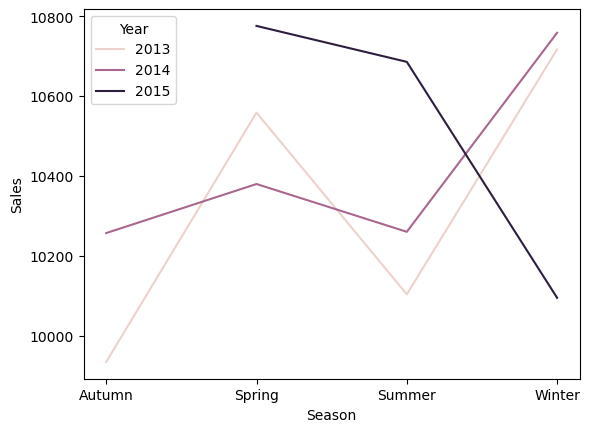

In [94]:
sns.lineplot(x="Season", y="Sales", data=Season_year, hue='Year')

<Axes: xlabel='Year', ylabel='Sales'>

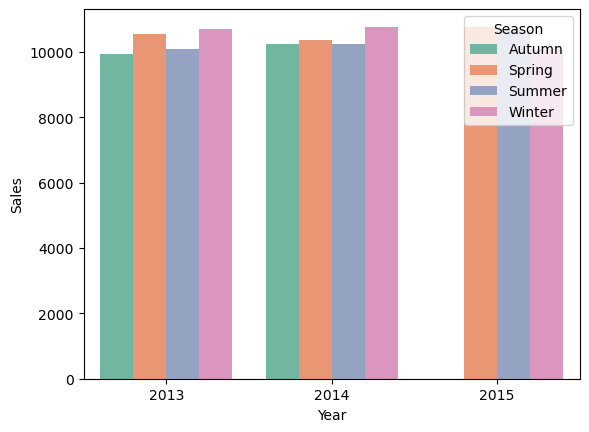

In [95]:
sns.barplot(data=Season_year, y='Sales',x='Year', hue='Season',palette='Set2')

<Axes: xlabel='Season', ylabel='Sales'>

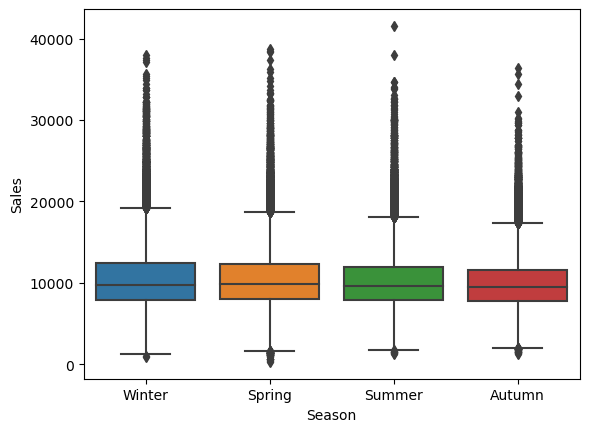

In [96]:
sns.boxplot(data=final_train, x='Season',y='Sales')

In [97]:
Season_customers = final_train.groupby(['Year', 'Season'])[['Customers']].agg(Customers=('Customers', 'mean')).reset_index()
Season_customers

,Year,Season,Customers
0,2013,Autumn,1177.092619
1,2013,Spring,1236.078823
2,2013,Summer,1191.066824
3,2013,Winter,1221.724306
4,2014,Autumn,1195.088844
5,2014,Spring,1211.251059
6,2014,Summer,1194.562820
7,2014,Winter,1220.101012
8,2015,Spring,1211.457403
9,2015,Summer,1180.966610


<Axes: xlabel='Season', ylabel='Customers'>

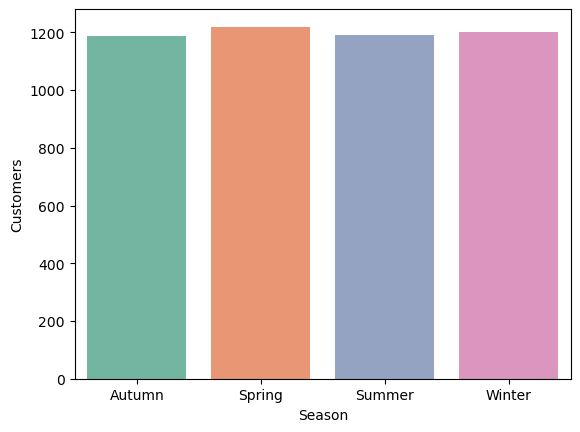

In [98]:
Season_customers2 = final_train.groupby(['Season'])[['Customers']].agg(Customers=('Customers', 'mean')).reset_index()
sns.barplot(data=Season_customers2, y='Customers',x='Season', palette='Set2')

<Axes: xlabel='Season', ylabel='AvgPurchase'>

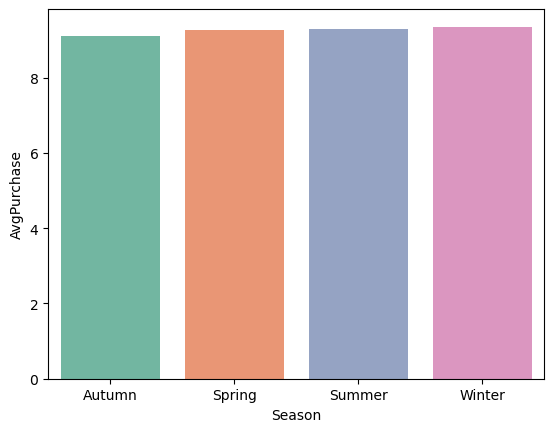

In [99]:
Season_customers_avgpurchase = final_train.groupby(['Season'])[['AvgPurchase']].agg(AvgPurchase=('AvgPurchase', 'mean')).reset_index()
sns.barplot(data=Season_customers_avgpurchase, y='AvgPurchase',x='Season', palette='Set2')

Autumn has the lowest average purchase.

In [100]:
Season_customers_avgpurchase

,Season,AvgPurchase
0,Autumn,9.111439
1,Spring,9.268582
2,Summer,9.301364
3,Winter,9.354614


<Axes: xlabel='Season', ylabel='Customers'>

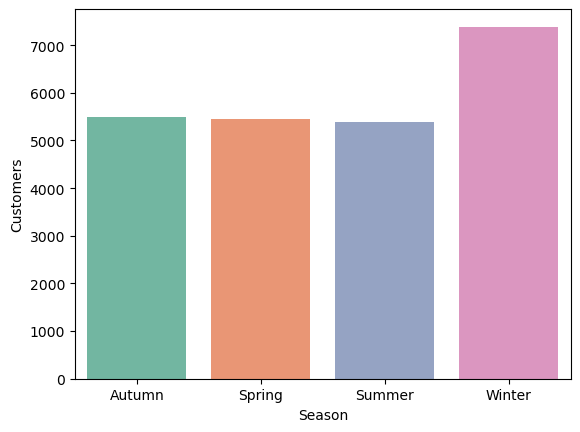

In [101]:
Season_customers_max= final_train.groupby(['Season'])[['Customers']].agg(Customers=('Customers', 'max')).reset_index()
sns.barplot(data=Season_customers_max, y='Customers',x='Season', palette='Set2')

<Axes: xlabel='Season', ylabel='Saless'>

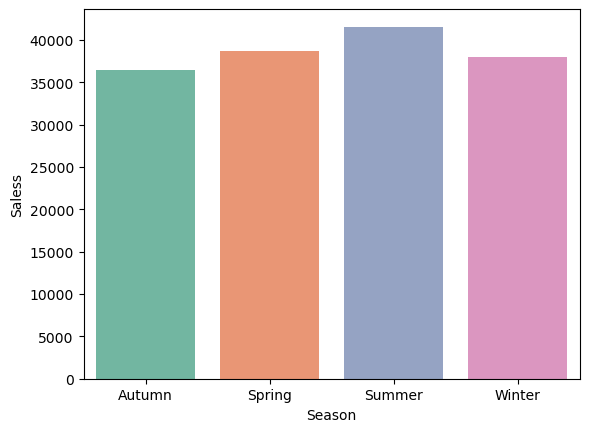

In [102]:
Season_sales_max = final_train.groupby(['Season'])[['Sales']].agg(Saless=('Sales', 'max')).reset_index()
sns.barplot(data=Season_sales_max, y='Saless', x='Season', palette='Set2')

**How do sales change by week and by month**

In [103]:
by_day = final_train.groupby('DayOfWeek').agg(Sales=('Sales', 'mean')).reset_index()

In [104]:
by_day

,DayOfWeek,Sales
0,1,12159.854412
1,2,10613.419802
2,3,10057.835135
3,4,10127.362772
4,5,10491.515270
5,6,9067.532976
6,7,10321.650044


Text(0.5, 1.0, 'Sales by Day of Week')

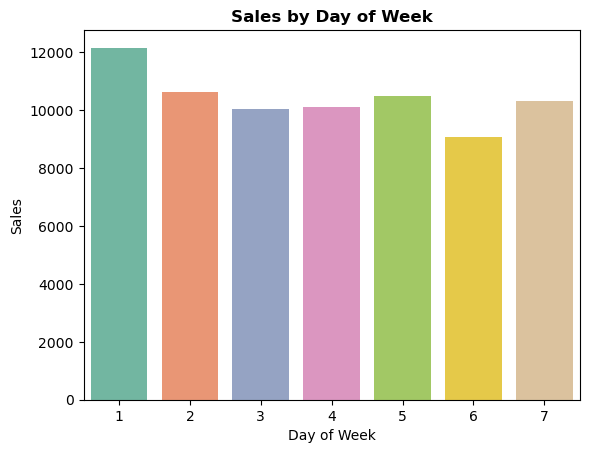

In [105]:
sns.barplot(data=by_day, y='Sales',x='DayOfWeek', palette='Set2')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.title('Sales by Day of Week', fontweight='bold')

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

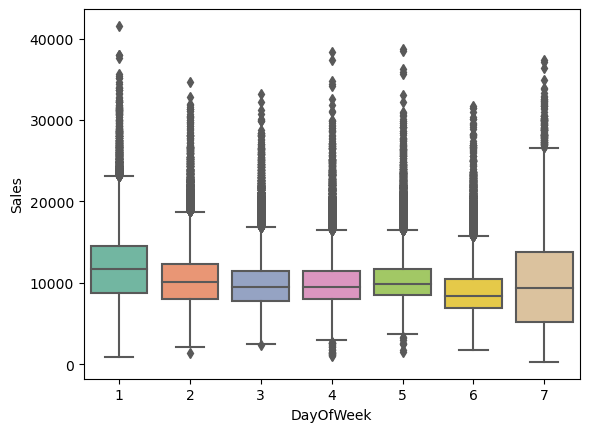

In [106]:
sns.boxplot(data=final_train, x='DayOfWeek',y='Sales', palette='Set2')

Text(0.5, 1.0, 'Sales by Day of The Week')

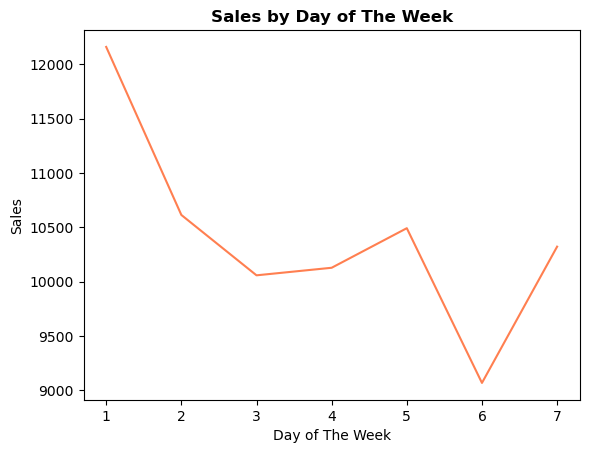

In [107]:
sns.lineplot(data=by_day, y='Sales',x='DayOfWeek',color='coral')
plt.xlabel('Day of The Week')
plt.ylabel('Sales')
plt.title('Sales by Day of The Week',fontweight='bold')

In [108]:
by_month = final_train.groupby('Month').agg(Sales=('Sales', 'mean')).reset_index()
by_month

,Month,Sales
0,1,9822.262803
1,2,9944.128699
2,3,10471.333525
3,4,10575.457072
4,5,10668.951964
5,6,10511.351426
6,7,10363.269942
7,8,9933.842312
8,9,9754.769572
9,10,9831.772054


Text(0.5, 1.0, 'Sales by Month')

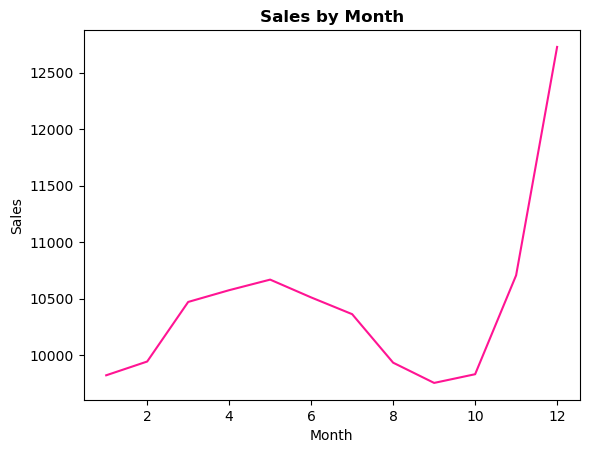

In [109]:
sns.lineplot(data=by_month, y='Sales',x='Month',color='deeppink')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month', fontweight='bold')

Text(0.5, 1.0, 'Sales by Month')

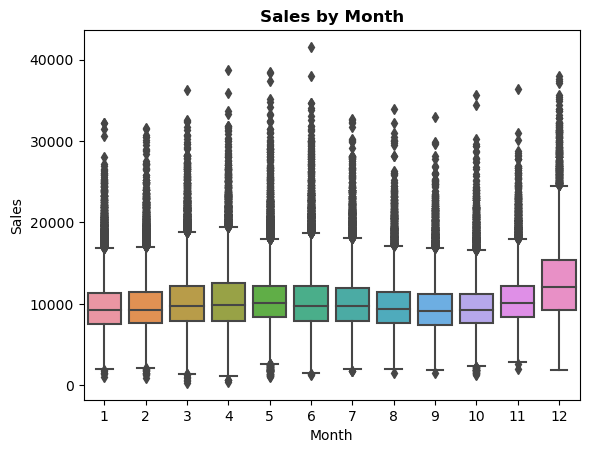

In [110]:
sns.boxplot(data=final_train, x='Month',y='Sales')
plt.title('Sales by Month', fontweight='bold')

/var/folders/pn/v7rr51hn7pb00j1cc94bc5240000gn/T/ipykernel_39397/1727542713.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_monthly = final_train.resample('M').sum()  # Resample data to monthly frequency


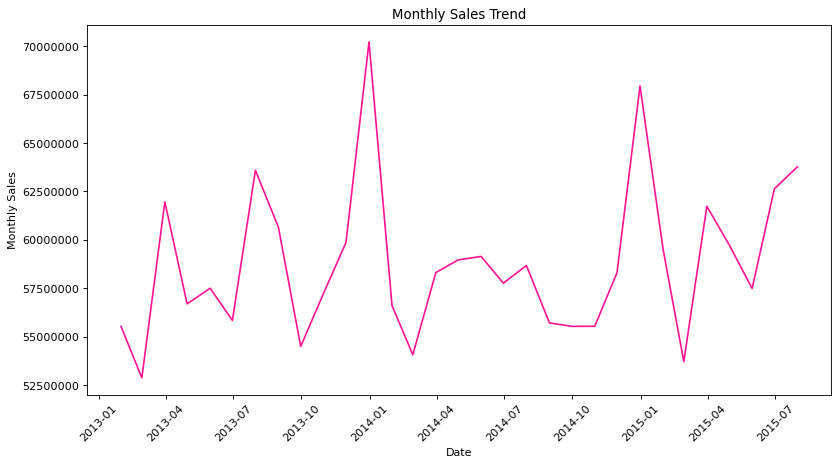

In [111]:
train_monthly = final_train.resample('M').sum()  # Resample data to monthly frequency

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train_monthly.index, train_monthly['Sales'],color='deeppink')
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)  
plt.ticklabel_format(style='plain', axis='y')
plt.show()        

/var/folders/pn/v7rr51hn7pb00j1cc94bc5240000gn/T/ipykernel_39397/3300885325.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_quarterly = final_train.loc[final_train.index.isin(quarters)].resample('Q').sum()


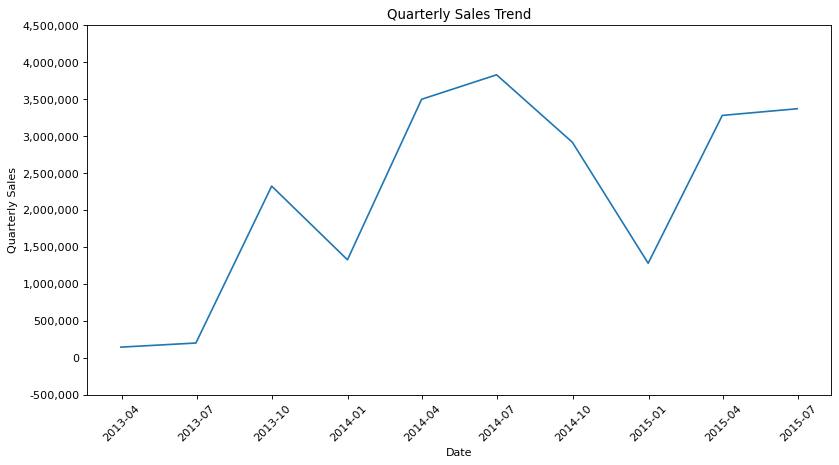

In [112]:
start_date = final_train.index.min()
end_date = final_train.index.max()
quarters = pd.date_range(start=start_date, end=end_date, freq='Q')

# Resample and aggregate data for the specified quarters
train_quarterly = final_train.loc[final_train.index.isin(quarters)].resample('Q').sum()

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train_quarterly.index, train_quarterly['Sales'])
plt.xlabel('Date')
plt.ylabel('Quarterly Sales')
plt.title('Quarterly Sales Trend')
plt.xticks(rotation=45)

y_ticks, _ = plt.yticks()

plt.yticks(y_ticks, ['{:,.0f}'.format(y) for y in y_ticks])

# Show the plot
plt.show()


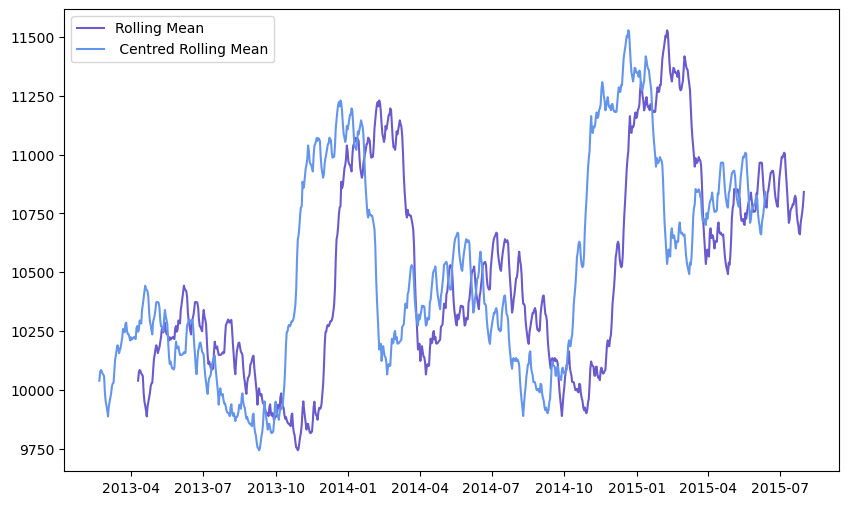

In [113]:
daily_sales_mean = merged_sales['Sales'].resample('D').mean()
roll_mean = daily_sales_mean.rolling(window=100).mean()
roll_mean_centre=daily_sales_mean.rolling(window=100, center=True).mean()
plt.figure(figsize=(10, 6)) 
plt.plot(roll_mean, color='slateblue', label='Rolling Mean')
plt.plot(roll_mean_centre, color='cornflowerblue', label=' Centred Rolling Mean')
plt.legend()

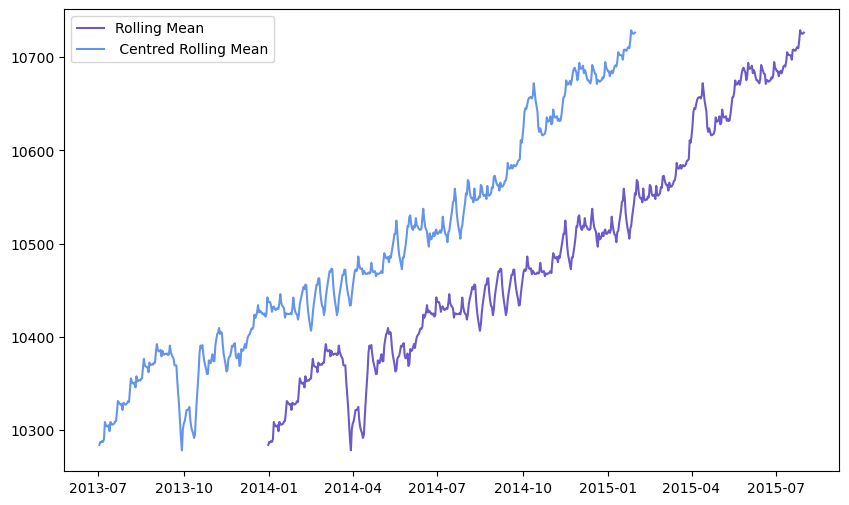

In [114]:
roll_mean2 = daily_sales_mean.rolling(window=365).mean()
roll_mean_centre2=daily_sales_mean.rolling(window=365, center=True).mean()
plt.figure(figsize=(10, 6)) 
plt.plot(roll_mean2, color='slateblue', label='Rolling Mean')
plt.plot(roll_mean_centre2, color='cornflowerblue', label=' Centred Rolling Mean')
plt.legend()